In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

# Load the dataset
file_path = r"locations.csv"
data = pd.read_csv(file_path)

# Feature Engineering

data['Room_to_Bathroom_Ratio'] = data['Bedrooms'] / data['Bathrooms']
data['Room_to_Bathroom_Ratio'] = data['Room_to_Bathroom_Ratio'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Room_to_Bathroom_Ratio'])

data['Price_per_m2'] = data['Price'] / data['Area (m²)']

q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
outliers = (data['Price'] < (q1 - 1.5 * iqr)) | (data['Price'] > (q3 + 1.5 * iqr))
data = data[~outliers]

numeric_features = ['Area (m²)', 'Price_per_m2', 'Room_to_Bathroom_Ratio']
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

label_encoder = LabelEncoder()
data['Property Type'] = label_encoder.fit_transform(data['Property Type'])
data['Governorate'] = label_encoder.fit_transform(data['Governorate'])
data['Location'] = label_encoder.fit_transform(data['Location'])

# Define Features and Target
X = data.drop(columns=['Price'])
y = data['Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 27.22
Mean Squared Error (MSE): 6228.22
Root Mean Squared Error (RMSE): 78.92
R² Score: 0.9860


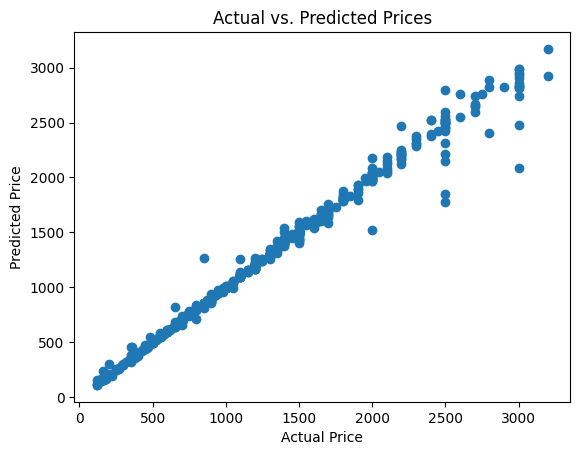

In [2]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [ ]:
# Single example to test
new_sample = pd.DataFrame({
    'Bedrooms': [3],
    'Bathrooms': [1],
    'Area (m²)': [120],
    'Property Type': 'Appartement',
    'Governorate': ['Tunis'],
    'Location': ['La Marsa']
})

# Feature Engineering 
new_sample['Room_to_Bathroom_Ratio'] = new_sample['Bedrooms'] / new_sample['Bathrooms']

new_sample['Price_per_m2'] = 0  

def safe_transform(label_encoder, value):
    if value in label_encoder.classes_:
        return label_encoder.transform([value])[0]
    else:
        return -1 

new_sample['Property Type'] = new_sample['Property Type'].apply(lambda x: safe_transform(label_encoder, x))
new_sample['Governorate'] = new_sample['Governorate'].apply(lambda x: safe_transform(label_encoder, x))
new_sample['Location'] = new_sample['Location'].apply(lambda x: safe_transform(label_encoder, x))

new_sample[numeric_features] = scaler.transform(new_sample[numeric_features])


new_sample = new_sample[X.columns]
predicted_price = best_model.predict(new_sample)
print(f"Predicted Price: {predicted_price[0]:.2f}")


Predicted Price: 1386.66


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore

file_path = r"locations_updated.csv"
data = pd.read_csv(file_path)

# Feature Engineering
data['Room_to_Bathroom_Ratio'] = data['Bedrooms'] / data['Bathrooms']
data['Room_to_Bathroom_Ratio'] = data['Room_to_Bathroom_Ratio'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Room_to_Bathroom_Ratio'])

data['Price_per_m2'] = data['Price'] / data['Area (m²)']

# Handle outliers using IQR
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
outliers = (data['Price'] < (q1 - 1.5 * iqr)) | (data['Price'] > (q3 + 1.5 * iqr))
data = data[~outliers]

# Scale numeric features
numeric_features = ['Area (m²)', 'Price_per_m2', 'Room_to_Bathroom_Ratio']
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Encode categorical features
label_encoder = LabelEncoder()
data['Property Type'] = label_encoder.fit_transform(data['Property Type'])
data['Governorate'] = label_encoder.fit_transform(data['Governorate'])
data['Location'] = label_encoder.fit_transform(data['Location'])

# Define Features and Target
X = data.drop(columns=['Price'])
y = data['Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance Metrics:
Mean Absolute Error (MAE): 17.58
Mean Squared Error (MSE): 3334.64
Root Mean Squared Error (RMSE): 57.75
R² Score: 0.9914


In [ ]:
# Single example to test
new_sample = pd.DataFrame({
    'Bedrooms': [2],
    'Bathrooms': [1],
    'Area (m²)': [102],
    'Property Type': 'Appartement',
    'Governorate': ['Sousse'],
    'Location': ['Hergla']
})

# Feature Engineering for new sample
new_sample['Room_to_Bathroom_Ratio'] = new_sample['Bedrooms'] / new_sample['Bathrooms']

new_sample['Price_per_m2'] = 0  

def safe_transform(label_encoder, value):
    if value in label_encoder.classes_:
        return label_encoder.transform([value])[0]
    else:
        return -1  

new_sample['Property Type'] = new_sample['Property Type'].apply(lambda x: safe_transform(label_encoder, x))
new_sample['Governorate'] = new_sample['Governorate'].apply(lambda x: safe_transform(label_encoder, x))
new_sample['Location'] = new_sample['Location'].apply(lambda x: safe_transform(label_encoder, x))

new_sample[numeric_features] = scaler.transform(new_sample[numeric_features])


new_sample = new_sample[X.columns]
# Predict the price
predicted_price = best_model.predict(new_sample)
print(f"Predicted Price: {predicted_price[0]:.2f}")


Predicted Price: 106.07
